# Simulator API Quicklook — tutorial notebook

This notebook uses the **public simulator API** from `pygsk.simulator`:

- `simulate(...)` → returns `data` (power, time, freq) and `sim` metadata.
- `quicklook(data, sim=...)` → renders lightcurve (nf=1) or dynamic spectrum (nf>1),
  with a compact two-line annotation box for parameters and contamination.


In [1]:
# --- Editable parameters ---
NS, NF, DT = 5000, 64, 1.0
TIME_START = None
FREQ_START = None   # e.g., 1.0e9
DF = None           # e.g., 1.0e6

N_TRUE, D_TRUE = 64, 1.0
MODE = "drift"       # "noise", "burst", or "drift"
CONTAM = {
    "mode": MODE,
    # For burst:
    "amp": 6.0,
    "frac": 0.10,
    "center": None,
    # For drift:
    "width_frac": 0.08,
    "period": 80.0,
    "base": 0.3,
    "swing": 0.2,
}
SEED = 42
FIGDIR = "_figs"; PNG_OUT = f"{FIGDIR}/nb_sim_quicklook.png"
NPZ_OUT = "sim.npz"
SHOW = True

import os, numpy as np
os.makedirs(FIGDIR, exist_ok=True)


In [2]:
# --- Imports ---
from pygsk.simulator import simulate, quicklook


In [3]:
# --- Run simulation ---
sim = simulate(
    ns=NS, nf=NF, dt=DT,
    time_start=TIME_START, freq_start=FREQ_START, df=DF,
    N=N_TRUE, d=D_TRUE, mode=MODE,
    contam=None if MODE == "noise" else CONTAM,
    seed=SEED,
)
data = sim["data"]

# Save NPZ (data + sim metadata)
np.savez(NPZ_OUT,
         power=data["power"], time_sec=data["time_sec"], freq_hz=data["freq_hz"],
         meta=sim["sim"]) 
print("Wrote", NPZ_OUT)


Wrote sim.npz


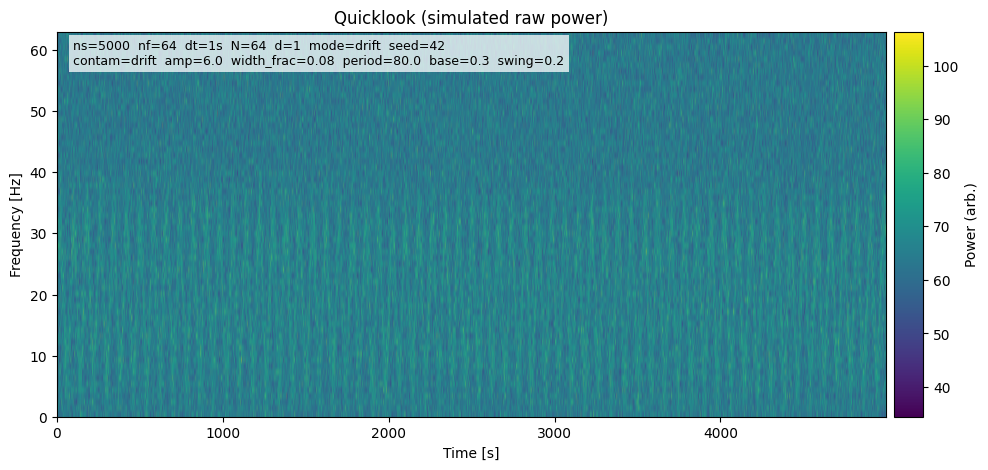

Saved _figs/nb_sim_quicklook.png


In [4]:
# --- Quicklook render ---
quicklook(
    data,
    sim=sim["sim"],
    title="Quicklook (simulated raw power)",
    show=SHOW,
    save_path=PNG_OUT,
)
print("Saved", PNG_OUT)
